In [33]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

### Use Variance Inflation Factor (VIF) to detect

In [6]:
# Load data
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [16]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [17]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Features"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range (X_scaled.shape[1])]
vif_data

,Features,VIF
0,MedInc,2.501295
1,HouseAge,1.241254
2,AveRooms,8.342786
3,AveBedrms,6.994995
4,Population,1.138125
5,AveOccup,1.008324
6,Latitude,9.297624
7,Longitude,8.962263


In [24]:
# High multicollinearity (VIF > 10)
vif_data[vif_data["VIF"] > 10]

,Features,VIF


In [ ]:
# Moderate multicollinearity (VIF > 5)
vif_data[(vif_data["VIF"] > 5) & (vif_data["VIF"] < 10)]

,Features,VIF
2,AveRooms,8.342786
3,AveBedrms,6.994995
6,Latitude,9.297624
7,Longitude,8.962263


In [30]:
corr_matrix = df.corr()
corr_matrix

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


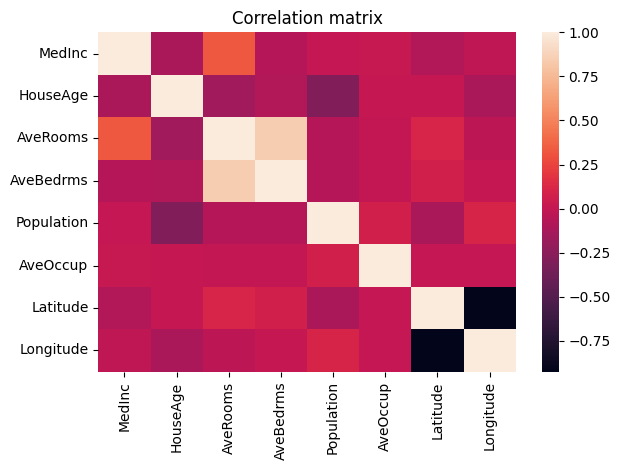

In [37]:
# Plot heatmap
plt.figure()
sns.heatmap(data=corr_matrix)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()